# 统计学习方法 笔记

## ————python 实现及练习 

李航的《统计学习方法》一书， 对统计机器学习作了很好的理论概述。

全书理论十足， 但没有相应的实践代码， 正好可以来练手。


# 第二章 感知器

动手实现之前可以先看看[zhimind教程](http://www.zhimind.com/tutorial/0c089ff0-48f8-43ed-a84f-760d73a1a68d)， 虽然感知器理论不算太复杂。

感知器学习算法 简单而易于实现， 分为原始形式和对偶形式， 是 支持向量机、 神经网络的基础

特征：

1. 二元分类的线性分类器
2. 输入为实例的特征向量
3. 输出为类别， 取+1 或 -1 值

即输入空间中， 将实例划分正负两类的超平面。

### 前期准备

导入相应包， 所以建议您有一定的 numpy, matplotlib, sklearn 基础, 或者还有pandas。 python基础更是必要的——这毕竟不是基于R或其他语言的。


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier

首先， 我们要使用 sciki-learn 的数据生成器来生成随机数据——简单体验，数据不好找。

* 生成随机数据

方案： 使用 make_blobs ( [make_blobs](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html))

1. 数据量设定为 n=50
2. 只设定两类
3. 两类数据划分明确， 不存在混合，尽量让数据线性可分(但建议cluster_std=0.85)，免得明显用一条y=???就能划分。

In [ ]:
# Todo， 练习熟悉、 复习
# 生成 50个两类、线性可分的随机数据

import sklearn.datasets as dss

data, data_class = None

assert len(data) == 50, u"数据个数不对"
assert len(data_class) == 50, u"数据类别个数不对"
assert data_class.tolist().count(0) + data_class.tolist().count(1) == 50, u"应该是0和1两类数据"

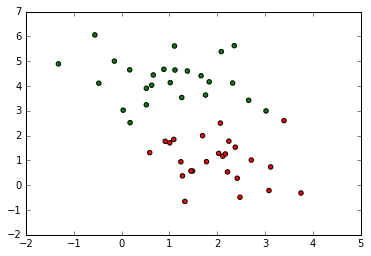

In [32]:
import sklearn.datasets as dss

n_samples = 50

data, data_class = dss.make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.9)

cl = ['r' if e else 'g' for e in data_class]

plt.scatter(data[:, 0], data[:, 1], c=cl)

* 绘图

使用plt.scatter 绘制散点图——总不能绘成折线图、饼状图什么的。

但我们要使用不同颜色标注， 这里定为 red 和 green

matplotlib的scatter 使用手册见 [scatter api](http://matplotlib.org/api/pyplot_api.html?highlight=scatter#matplotlib.pyplot.scatter)

In [15]:
# Todo， 练习
# scatter需要一个参数， 传递数据点对应颜色
# 我看得有点晕， 数值型不会弄， 要求您把0、1转成 红色和绿色

cl = None

assert cl.count('r') + cl.count('g') == 50, u"应该是 红色 和 绿色 两类数据"

In [ ]:
# Todo， 练习
# 调用scatter 绘制图案

plt.scatter( )

## 理论简述

### 模型定义：

输入空间（特征空间）是 $ X \subset R^n $

输入空间到输出空间的如下函数  $$ f(x) = sign(w \cdot x + b) $$ 称为感知器

其中 w 和 b是感知器的模型参数， w 是权值或权值向量， b 是偏置(bias、 residual)

make_blobs 生成的是二维数据， n = 2， 所以一条直线就可以划分， w 是一维向量， 加上第0维的 b， 用 theta 表示为:

$ \theta = (b , w_1) $

初始化， 令b=0(为了验证), w=0, 即 theta = [0,0] , 请注意，  请使用ndarray

In [42]:
# Todo， 练习
# 初始化， 令 theta = [0, 0]

theta = np.zeros(2)

assert len(theta) == 2, u'2维向量'
assert theta.tolist().count(0) == 2, u'说好的2维0向量'

## 数据准备

把data 拆成 X 和 y, 把X改成50行2列的矩阵， 第一列设定为1， 对应w_0即b。

In [60]:
# Todo， 练习
# 把data 拆成 X 和 y, 把X改成50行2列的矩阵, 第一列设定为 1

X = 
y = 

assert y.shape == (50L, 1L), u'50行1列的 y向量'
assert X.shape == (50L, 2L), u'50行2列的 X向量'
assert X[:, [0]].all() == np.ones(50).reshape(50,1).all(), u'X向量的第1列全为1'
# 上一个assert和下一个应该等效
np.testing.assert_array_equal(X[:, [0]], np.ones(50).reshape(50,1))

请在上一图的基础上， 绘出初始值对应的超平面  $ w\cdot x + b = 0$

绘图需要 x 轴和y轴数据， 函数的x轴数据使用 np.linspace, 范围从-2 到 5， 采样个数50

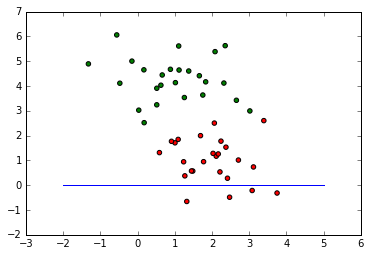

In [39]:
# Todo， 练习
# 请在上一图的基础上， 绘出初始值对应的超平面  w⋅x+b=0w⋅x+b=0 

plt.scatter()

# 绘图需要 x 轴和y轴数据, x使用np.linspace 已经给出， 求y
line_x = np.linspace(-2, 5, 50)
line_y = 

plt.plot(line_x, line_y)

assert len(y) == 50, u'长度不对'

### 2. 学习策略

即定义（经验）损失函数（成本函数）， 并求其极小值（最小值）

$$\min_{w,b} L(w,b) = -\sum_{x_i \in M} y_i(w*x_i + b)$$


# 晕了，改时间再写

(5L, 2L)
(5L, 1L)
[ 1.   1.5  2.   2.5  3. ]
[ 22.]


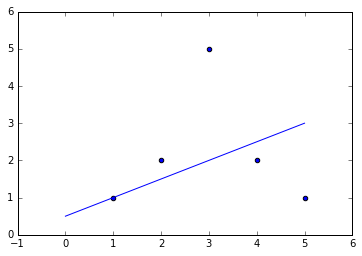

In [70]:
# Todo， 练习
# 请实现 损失函数， 参数X, y, theta

def cost_function(X, y, theta):
    print np.dot(X, theta)
    return np.dot(y.transpose(), np.dot(X, theta))

test_X = np.array([[1, 1], [1,2], [1,3],[1,4],[1,5]])
print test_X.shape

test_y = np.array([[1], [2], [5],[2],[1]])
print test_y.shape

test_theta = np.array([0.5, 0.5])

plt.scatter(test_X[:,[1]], test_y)
plt.plot([0, 5], [0.5, 3])

print cost_function(test_X, test_y, test_theta)

### 3. 算法

#### 算法 1 原始形式

1. 选取初值 w, b, 即theta
2. 在训练集中选取数据  $ (x_i, y_i)$
3. 如果 $ y_i(w\cdot{x_i} + b) \leq 0 $ 
$$ w = w + \alpha y_i x_i $$
$$b = b + \alpha y_i $$
4. 转到 第二步， 直到训练集中没有误分类点


在此之前， 先给数据加上第0维的1

In [ ]:
# 请！
data = data

In [ ]:
data = np.column_stack( [ np.ones(len(data)) , data])
print data[:3]

In [ ]:
eta = 2
for i in range(len(data)):
    if (c[i] - 0.5) * (np.dot(data[i], theta)) <= 0:

        theta = theta + eta * (c[i] - 0.5) * data[i]
        print theta
print theta

In [ ]:
plt.scatter(data[:, 1], data[:, 2], c=c)
plt.plot(x, - (theta[1] * x  + theta[0])/theta[2])

In [ ]:
print data
print np.dot(data, theta)